In [200]:
import scipy as sp
import csv
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score  
sns.set()

In [201]:
def preprocess_sex(df):  
    df['Gender'] = df['Gender'].replace({'Male':0, 'Female': 1})

In [202]:
def drop_less_effective_features(df):    
    drop_columns = ['id', 'Gender']  
    df.drop(columns=drop_columns, inplace=True)

In [203]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        891 non-null    int64  
 1   Age       891 non-null    int64  
 2   Gender    891 non-null    object 
 3   T_Bil     891 non-null    float64
 4   D_Bil     891 non-null    float64
 5   ALP       891 non-null    float64
 6   ALT_GPT   891 non-null    float64
 7   AST_GOT   891 non-null    float64
 8   TP        891 non-null    float64
 9   Alb       891 non-null    float64
 10  AG_ratio  887 non-null    float64
 11  disease   891 non-null    int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 80.1+ KB


In [204]:
corr = train_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
id,1.000000,0.049873,0.005274,0.002191,0.004649,-0.008899,-0.013150,-0.051528,-0.050070,-0.045367,0.009745
Age,0.049873,1.000000,0.023838,0.022956,0.043923,-0.068371,-0.043663,-0.211715,-0.261470,-0.128418,0.144898
T_Bil,0.005274,0.023838,1.000000,0.992112,0.256488,0.256965,0.355203,-0.014836,-0.230144,-0.253245,0.373955
D_Bil,0.002191,0.022956,0.992112,1.000000,0.254928,0.236076,0.328497,-0.014602,-0.224510,-0.244583,0.366597
ALP,0.004649,0.043923,0.256488,0.254928,1.000000,0.096297,0.116894,-0.023761,-0.154299,-0.191594,0.274803
ALT_GPT,-0.008899,-0.068371,0.256965,0.236076,0.096297,1.000000,0.866955,-0.005689,-0.010086,-0.003151,0.218902
AST_GOT,-0.013150,-0.043663,0.355203,0.328497,0.116894,0.866955,1.000000,-0.007298,-0.068083,-0.063927,0.259385
TP,-0.051528,-0.211715,-0.014836,-0.014602,-0.023761,-0.005689,-0.007298,1.000000,0.782394,0.154946,-0.016355
Alb,-0.050070,-0.261470,-0.230144,-0.224510,-0.154299,-0.010086,-0.068083,0.782394,1.000000,0.641819,-0.187262
AG_ratio,-0.045367,-0.128418,-0.253245,-0.244583,-0.191594,-0.003151,-0.063927,0.154946,0.641819,1.000000,-0.251914


In [205]:
train_data.groupby('T_Bil')['disease'].mean()

T_Bil
0.4     0.000000
0.5     0.045455
0.6     0.000000
0.7     0.057143
0.8     0.093750
          ...   
30.9    1.000000
31.0    1.000000
31.1    1.000000
32.9    1.000000
43.2    1.000000
Name: disease, Length: 121, dtype: float64

In [206]:
train_data.head()

,id,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,0,60,Male,2.9,1.3,170.9,42.1,37.1,5.5,2.9,1.01,1
1,1,28,Female,0.7,0.1,158.8,26.0,23.9,6.4,3.7,1.36,0
2,2,60,Male,23.1,12.5,962.0,53.0,40.9,6.8,3.3,0.96,1
3,3,20,Male,1.0,0.5,415.9,33.9,39.0,7.0,3.8,1.31,0
4,4,44,Female,0.6,0.3,152.9,40.9,42.0,4.5,2.1,1.04,0


In [207]:
train_data.isnull().sum()

id          0
Age         0
Gender      0
T_Bil       0
D_Bil       0
ALP         0
ALT_GPT     0
AST_GOT     0
TP          0
Alb         0
AG_ratio    4
disease     0
dtype: int64

In [208]:
train_data['AG_ratio'] = train_data['AG_ratio'].fillna(train_data['AG_ratio'].mean())

In [209]:
preprocess_sex(train_data)

In [210]:
out_id = test_data['id']

In [211]:
y_train = train_data['disease']
X_train = train_data.drop(columns=['id', 'Age', 'disease', 'Alb', 'AG_ratio', 'Gender', 'TP'])
X_test = test_data.drop(columns=['id', 'Age', 'Alb', 'AG_ratio', 'Gender', 'TP'])

In [212]:
# X_train = train_data.drop(columns=['id', 'Age', 'disease', 'Alb', 'AG_ratio', 'Gender', 'TP'])
# X_test = test_data.drop(columns=['id', 'Age', 'Alb', 'AG_ratio', 'Gender', 'TP'])

In [213]:
X_train

,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT
0,2.9,1.3,170.9,42.1,37.1
1,0.7,0.1,158.8,26.0,23.9
2,23.1,12.5,962.0,53.0,40.9
3,1.0,0.5,415.9,33.9,39.0
4,0.6,0.3,152.9,40.9,42.0
...,...,...,...,...,...
886,0.7,0.3,164.2,30.0,29.0
887,1.0,0.3,130.1,23.9,25.0
888,23.5,12.7,574.0,43.1,47.0
889,1.2,0.4,130.0,23.2,42.0


In [214]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)  
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  
result = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')  
print('Score:{0:.4f}'.format(result.mean())) 

Score:0.8306


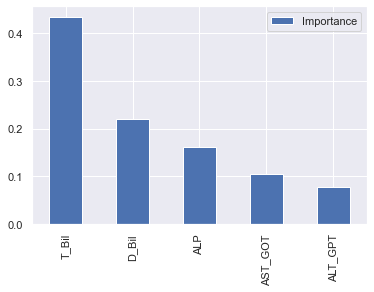

In [215]:
# Evaluation of features  
model.fit(X_train, y_train)  
importances = model.feature_importances_  

# Visualize the importance of each feature  
feature_importances = pd.DataFrame(importances, index=X_train.columns, columns=['Importance'])  
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)  
feature_importances.plot.bar()

In [216]:
predictions = model.predict(X_test) 

In [226]:
output = dict(zip(out_id.to_list(), predictions))
submission = pd.DataFrame.from_dict(output,orient='index')
submission.to_csv('submission.csv', header=False)

In [218]:
# with open("submission.csv", 'w') as csv_file:
#     writer = csv.writer(csv_file)
#     for i, j in zip(out_id.to_list(), predictions):
#         writer.writerow([i, j])

891 0
892 1
893 0
894 1
895 0
896 1
897 0
898 0
899 1
900 0
901 1
902 0
903 1
904 1
905 0
906 0
907 1
908 1
909 1
910 0
911 0
912 0
913 0
914 0
915 1
916 0
917 0
918 0
919 1
920 0
921 1
922 0
923 0
924 1
925 0
926 0
927 0
928 0
929 0
930 0
931 0
932 0
933 0
934 1
935 0
936 0
937 1
938 1
939 0
940 0
941 1
942 0
943 1
944 0
945 1
946 0
947 0
948 0
949 1
950 0
951 0
952 0
953 0
954 0
955 1
956 0
957 0
958 1
959 1
960 1
961 1
962 0
963 1
964 0
965 0
966 0
967 0
968 1
969 1
970 1
971 0
972 0
973 0
974 0
975 0
976 0
977 1
978 1
979 1
980 1
981 0
982 0
983 0
984 0
985 0
986 1
987 1
988 1
989 1
990 0
991 0
992 1
993 0
994 1
995 0
996 1
997 1
998 0
999 1
1000 1
1001 0
1002 1
1003 0
1004 0
1005 0
1006 0
1007 1
1008 0
1009 1
1010 1
1011 1
1012 0
1013 0
1014 0
1015 1
1016 0
1017 0
1018 1
1019 1
1020 0
1021 0
1022 0
1023 1
1024 0
1025 0
1026 0
1027 0
1028 0
1029 1
1030 1
1031 1
1032 1
1033 0
1034 1
1035 0
1036 0
1037 1
1038 1
1039 1
1040 0
1041 1
1042 0
1043 0
1044 0
1045 0
1046 0
1047 0
1048 0
104